In [1]:
import numpy as np
import pandas as pd
import torch
import matplotlib.pyplot as plt
from torch import nn, optim
from torch.utils.data import DataLoader

In [2]:
# Red Wine quality - https://www.kaggle.com/datasets/uciml/red-wine-quality-cortez-et-al-2009

In [3]:
df = pd.read_csv("winequality-red.csv")

In [4]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


### Проверка датасета на корректность (никаких NULL, NaN, char)

In [5]:
df.isna().any()

fixed acidity           False
volatile acidity        False
citric acid             False
residual sugar          False
chlorides               False
free sulfur dioxide     False
total sulfur dioxide    False
density                 False
pH                      False
sulphates               False
alcohol                 False
quality                 False
dtype: bool

In [6]:
df.isnull().any()

fixed acidity           False
volatile acidity        False
citric acid             False
residual sugar          False
chlorides               False
free sulfur dioxide     False
total sulfur dioxide    False
density                 False
pH                      False
sulphates               False
alcohol                 False
quality                 False
dtype: bool

In [7]:
df.dtypes.value_counts()

float64    11
int64       1
dtype: int64

In [8]:
df.shape

(1599, 12)

### Небольшая проверка на категор. признаки

In [9]:
df.head(8)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7


In [10]:
df["fixed acidity"].unique()

array([ 7.4,  7.8, 11.2,  7.9,  7.3,  7.5,  6.7,  5.6,  8.9,  8.5,  8.1,
        7.6,  6.9,  6.3,  7.1,  8.3,  5.2,  5.7,  8.8,  6.8,  4.6,  7.7,
        8.7,  6.4,  6.6,  8.6, 10.2,  7. ,  7.2,  9.3,  8. ,  9.7,  6.2,
        5. ,  4.7,  8.4, 10.1,  9.4,  9. ,  8.2,  6.1,  5.8,  9.2, 11.5,
        5.4,  9.6, 12.8, 11. , 11.6, 12. , 15. , 10.8, 11.1, 10. , 12.5,
       11.8, 10.9, 10.3, 11.4,  9.9, 10.4, 13.3, 10.6,  9.8, 13.4, 10.7,
       11.9, 12.4, 12.2, 13.8,  9.1, 13.5, 10.5, 12.6, 14. , 13.7,  9.5,
       12.7, 12.3, 15.6,  5.3, 11.3, 13. ,  6.5, 12.9, 14.3, 15.5, 11.7,
       13.2, 15.9, 12.1,  5.1,  4.9,  5.9,  6. ,  5.5])

In [11]:
df["volatile acidity"].unique()

array([0.7  , 0.88 , 0.76 , 0.28 , 0.66 , 0.6  , 0.65 , 0.58 , 0.5  ,
       0.615, 0.61 , 0.62 , 0.56 , 0.59 , 0.32 , 0.22 , 0.39 , 0.43 ,
       0.49 , 0.4  , 0.41 , 0.71 , 0.645, 0.675, 0.685, 0.655, 0.605,
       0.38 , 1.13 , 0.45 , 0.67 , 0.52 , 0.935, 0.29 , 0.31 , 0.51 ,
       0.42 , 0.63 , 0.69 , 0.735, 0.725, 0.705, 0.785, 0.75 , 0.625,
       0.3  , 0.55 , 1.02 , 0.775, 0.9  , 0.545, 0.575, 0.33 , 0.54 ,
       1.07 , 0.695, 1.33 , 0.745, 1.04 , 0.715, 0.415, 0.34 , 0.68 ,
       0.95 , 0.53 , 0.64 , 0.885, 0.805, 0.73 , 0.37 , 0.835, 1.09 ,
       0.57 , 0.44 , 0.635, 0.82 , 0.48 , 1.   , 0.21 , 0.35 , 0.975,
       0.26 , 0.87 , 0.18 , 0.27 , 0.2  , 0.36 , 0.83 , 0.46 , 0.47 ,
       0.77 , 0.815, 0.795, 0.665, 0.765, 0.24 , 0.85 , 0.84 , 0.96 ,
       0.78 , 0.23 , 0.315, 0.365, 0.25 , 0.825, 0.72 , 0.595, 0.585,
       0.915, 0.755, 0.845, 1.24 , 0.8  , 0.98 , 1.185, 0.92 , 1.035,
       1.025, 0.565, 0.74 , 1.115, 0.865, 0.875, 0.965, 0.91 , 0.89 ,
       1.01 , 0.305,

In [12]:
df["citric acid"].unique()

array([0.  , 0.04, 0.56, 0.06, 0.02, 0.36, 0.08, 0.29, 0.18, 0.19, 0.28,
       0.51, 0.48, 0.31, 0.21, 0.11, 0.14, 0.16, 0.24, 0.07, 0.12, 0.25,
       0.09, 0.3 , 0.2 , 0.22, 0.15, 0.43, 0.52, 0.23, 0.37, 0.26, 0.57,
       0.4 , 0.49, 0.05, 0.54, 0.64, 0.7 , 0.47, 0.44, 0.17, 0.68, 0.53,
       0.1 , 0.01, 0.55, 1.  , 0.03, 0.42, 0.33, 0.32, 0.35, 0.6 , 0.74,
       0.58, 0.5 , 0.76, 0.46, 0.45, 0.38, 0.39, 0.66, 0.62, 0.67, 0.79,
       0.63, 0.61, 0.71, 0.65, 0.59, 0.34, 0.69, 0.73, 0.72, 0.41, 0.27,
       0.75, 0.13, 0.78])

In [13]:
df["residual sugar"].unique()

array([ 1.9 ,  2.6 ,  2.3 ,  1.8 ,  1.6 ,  1.2 ,  2.  ,  6.1 ,  3.8 ,
        3.9 ,  1.7 ,  4.4 ,  2.4 ,  1.4 ,  2.5 , 10.7 ,  5.5 ,  2.1 ,
        1.5 ,  5.9 ,  2.8 ,  2.2 ,  3.  ,  3.4 ,  5.1 ,  4.65,  1.3 ,
        7.3 ,  7.2 ,  2.9 ,  2.7 ,  5.6 ,  3.1 ,  3.2 ,  3.3 ,  3.6 ,
        4.  ,  7.  ,  6.4 ,  3.5 , 11.  ,  3.65,  4.5 ,  4.8 ,  2.95,
        5.8 ,  6.2 ,  4.2 ,  7.9 ,  3.7 ,  6.7 ,  6.6 ,  2.15,  5.2 ,
        2.55, 15.5 ,  4.1 ,  8.3 ,  6.55,  4.6 ,  4.3 ,  5.15,  6.3 ,
        6.  ,  8.6 ,  7.5 ,  2.25,  4.25,  2.85,  3.45,  2.35,  2.65,
        9.  ,  8.8 ,  5.  ,  1.65,  2.05,  0.9 ,  8.9 ,  8.1 ,  4.7 ,
        1.75,  7.8 , 12.9 , 13.4 ,  5.4 , 15.4 ,  3.75, 13.8 ,  5.7 ,
       13.9 ])

In [14]:
df["free sulfur dioxide"].unique()

array([11. , 25. , 15. , 17. , 13. ,  9. , 16. , 52. , 51. , 35. ,  6. ,
       29. , 23. , 10. , 21. ,  4. , 14. ,  8. , 22. , 40. ,  5. ,  3. ,
        7. , 12. , 30. , 33. , 50. , 19. , 20. , 27. , 18. , 28. , 34. ,
       42. , 41. , 37. , 32. , 36. , 24. , 26. , 39. , 40.5, 68. , 31. ,
       38. , 43. , 47. ,  1. , 54. , 46. , 45. ,  2. ,  5.5, 53. , 37.5,
       57. , 48. , 72. , 55. , 66. ])

In [15]:
df["sulphates"].unique()

array([0.56, 0.68, 0.65, 0.58, 0.46, 0.47, 0.57, 0.8 , 0.54, 0.52, 1.56,
       0.88, 0.93, 0.75, 1.28, 0.5 , 1.08, 0.53, 0.91, 0.63, 0.59, 0.55,
       0.66, 0.6 , 0.73, 0.48, 0.83, 0.51, 0.9 , 1.2 , 0.74, 0.64, 0.77,
       0.71, 0.62, 0.39, 0.79, 0.95, 0.82, 1.12, 1.14, 0.78, 1.95, 1.22,
       1.98, 0.61, 1.31, 0.69, 0.67, 0.7 , 0.49, 0.92, 2.  , 0.72, 1.59,
       0.33, 1.02, 0.97, 0.85, 0.43, 1.03, 0.86, 0.76, 1.61, 1.09, 0.84,
       0.96, 0.45, 1.26, 0.87, 0.81, 1.  , 1.36, 1.18, 0.89, 0.98, 1.13,
       1.04, 1.11, 0.99, 1.07, 0.44, 1.06, 1.05, 0.42, 1.17, 1.62, 0.94,
       1.34, 1.16, 1.1 , 0.4 , 1.15, 0.37, 1.33, 1.01])

In [16]:
df["alcohol"].unique()

array([ 9.4       ,  9.8       , 10.        ,  9.5       , 10.5       ,
        9.2       ,  9.9       ,  9.1       ,  9.3       ,  9.        ,
        9.7       , 10.1       , 10.6       ,  9.6       , 10.8       ,
       10.3       , 13.1       , 10.2       , 10.9       , 10.7       ,
       12.9       , 10.4       , 13.        , 14.        , 11.5       ,
       11.4       , 12.4       , 11.        , 12.2       , 12.8       ,
       12.6       , 12.5       , 11.7       , 11.3       , 12.3       ,
       12.        , 11.9       , 11.8       ,  8.7       , 13.3       ,
       11.2       , 11.6       , 11.1       , 13.4       , 12.1       ,
        8.4       , 12.7       , 14.9       , 13.2       , 13.6       ,
       13.5       , 10.03333333,  9.55      ,  8.5       , 11.06666667,
        9.56666667, 10.55      ,  8.8       , 13.56666667, 11.95      ,
        9.95      ,  9.23333333,  9.25      ,  9.05      , 10.75      ])

In [17]:
df["quality"].unique()  # категориальный, с другой стороны можно рассматривать как вещественный
                        # т.к. 5 лучше чем 3 

array([5, 6, 7, 4, 8, 3], dtype=int64)

### Подготовка train и test выборки к обучению

In [18]:
class MyDataset(torch.utils.data.Dataset):
    def __init__(self,df):
        
        df_x = df.drop(["quality"], axis = 1)
        df_y = df["quality"]
        self.x=torch.tensor(df_x.values,dtype=torch.float32)
        self.y=torch.tensor(df_y.values,dtype=torch.float32).unsqueeze(1)
        
    def __len__(self):
        return len(self.y)

    def __getitem__(self,idx):
        return self.x[idx],self.y[idx]

In [19]:
df_ = MyDataset(df)

In [20]:
test_size = int(0.3 * len(df_))

In [21]:
train_size = len(df_) - test_size

In [22]:
train_size

1120

In [23]:
val_size = 120

In [24]:
train_size -= val_size

In [25]:
test_df, train_df, val_df = torch.utils.data.random_split(df_, [test_size, train_size, val_size])

In [26]:
len(test_df), len(train_df), len(val_df)

(479, 1000, 120)

### Подготовка data loader

In [27]:
train_loader =  torch.utils.data.DataLoader(train_df, batch_size=100, shuffle=True)
test_loader =  torch.utils.data.DataLoader(test_df, batch_size=100, shuffle=True)
val_loader = torch.utils.data.DataLoader(val_df, batch_size=100, shuffle=True)

In [28]:
data, labels = next(iter(test_loader))
print(data.shape)
print(labels.shape)

torch.Size([100, 11])
torch.Size([100, 1])


### Настройка модели

In [29]:
# Слои
input_size = 11
hidden_size_1 = 6
hidden_size_2 = 3
output_size = 1

In [30]:
# Модель
model = nn.Sequential(nn.Linear(input_size, hidden_size_1),
                      nn.ReLU(),
                      nn.Linear(hidden_size_1, hidden_size_2),
                      nn.ReLU(),
                      nn.Linear(hidden_size_2, output_size))
print(model)

Sequential(
  (0): Linear(in_features=11, out_features=6, bias=True)
  (1): ReLU()
  (2): Linear(in_features=6, out_features=3, bias=True)
  (3): ReLU()
  (4): Linear(in_features=3, out_features=1, bias=True)
)


In [31]:
# Loss и оптимизатор
loss_F = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=20, gamma=0.1)

### Обучение

In [32]:
import torchmetrics

In [33]:
epochs = 100
loss_train_history = []
loss_val_history = []
for epoch in range(epochs):

    # Add metrics
    MSE = torchmetrics.MeanSquaredError()
    MAE = torchmetrics.MeanAbsoluteError()
    MAPE = torchmetrics.MeanAbsolutePercentageError()
    RMSE = torchmetrics.MeanSquaredError(squared=False)
    MSLE = torchmetrics.MeanSquaredLogError()
    loss_train = 0.0
    
    for data, labels in train_loader:        
        
        # Тренируем побатчево всю выборку
        optimizer.zero_grad()
        
        output = model(data)
        loss = loss_F(output, labels)
        
        loss.backward()
        optimizer.step()
        
        loss_train += loss.item()
        
        
        # Upd. metrics 
        MSE.update(output, labels)
        MAE.update(output, labels)
        MAPE.update(output, labels)
        RMSE.update(output, labels)
        MSLE.update(output, labels)
    
    else:
        # каждые 20 эпох lr снижается
        scheduler.step()  
        
        # Каждую эпоху записываем в history
        with torch.no_grad():
            # Add metrics
            MSE_ = torchmetrics.MeanSquaredError()
            MAE_ = torchmetrics.MeanAbsoluteError()
            MAPE_ = torchmetrics.MeanAbsolutePercentageError()
            RMSE_ = torchmetrics.MeanSquaredError(squared=False)
            MSLE_ = torchmetrics.MeanSquaredLogError()
            loss_val = 0.0
            for data_val, labels_val in val_loader:
                output_val = model(data_val)
                loss_val_ = loss_F(output_val, labels_val)
                loss_val += loss_val_.item()
                
                # Upd. metrics 
                MSE_.update(output_val, labels_val)
                MAE_.update(output_val, labels_val)
                MAPE_.update(output_val, labels_val)
                RMSE_.update(output_val, labels_val)
                MSLE_.update(output_val, labels_val)
                
        loss_train_history.append(loss_train)
        loss_val_history.append(loss_val)
        
        
        # Делаем принт метрик для выборки
        print(f"Epoch - {epoch+1} of {epochs}, lr={scheduler.get_last_lr()[0]}")
        print(f"Loss train - {loss_train}, Loss val - {loss_val}")
        print(f"train MSE - {MSE.compute().item()}, val MSE - {MSE_.compute().item()}")
        print(f"train MAE - {MAE.compute().item()}, val MAE - {MAE_.compute().item()}")
        print(f"train MAPE - {MAPE.compute().item()}, val MAPE - {MAPE_.compute().item()}")
        print(f"train RMSE - {RMSE.compute().item()}, val RMSE - {RMSE_.compute().item()}")
        print(f"train MSLE - {MSLE.compute().item()}, val MSLE - {MSLE_.compute().item()}")
        print()
        
print("Train end!")

Epoch - 1 of 100, lr=0.01
Loss train - 249.50123596191406, Loss val - 36.3409423828125
train MSE - 24.950124740600586, val MSE - 16.81344223022461
train MAE - 4.9015116691589355, val MAE - 3.9814443588256836
train MAPE - 0.8678298592567444, val MAPE - 0.6975606083869934
train RMSE - 4.995009899139404, val RMSE - 4.100419998168945
train MSLE - nan, val MSLE - 0.8924043774604797

Epoch - 2 of 100, lr=0.01
Loss train - 112.59231948852539, Loss val - 10.455370426177979
train MSE - 11.259232521057129, val MSE - 5.629691123962402
train MAE - 3.0816650390625, val MAE - 2.049447774887085
train MAPE - 0.5369027853012085, val MAPE - 0.3554714024066925
train RMSE - 3.355478048324585, val RMSE - 2.372697114944458
train MSLE - 0.5167855620384216, val MSLE - 0.18259702622890472

Epoch - 3 of 100, lr=0.01
Loss train - 66.39680480957031, Loss val - 8.430030584335327
train MSE - 6.639680862426758, val MSE - 5.2457194328308105
train MAE - 2.0592830181121826, val MAE - 1.8523690700531006
train MAPE - 0.3

train MSE - 0.6076160669326782, val MSE - 0.6030530333518982
train MAE - 0.616976261138916, val MAE - 0.6126917600631714
train MAPE - 0.11379037797451019, val MAPE - 0.11194716393947601
train RMSE - 0.7794973254203796, val RMSE - 0.77656489610672
train MSLE - 0.0142907053232193, val MSLE - 0.01426744181662798

Epoch - 26 of 100, lr=0.001
Loss train - 6.068811506032944, Loss val - 1.380786657333374
train MSE - 0.6068811416625977, val MSE - 0.6030815243721008
train MAE - 0.6165058612823486, val MAE - 0.611990749835968
train MAPE - 0.11364349722862244, val MAPE - 0.11169838905334473
train RMSE - 0.7790257930755615, val RMSE - 0.7765832543373108
train MSLE - 0.014270680956542492, val MSLE - 0.01425999216735363

Epoch - 27 of 100, lr=0.001
Loss train - 6.071305572986603, Loss val - 0.9596332907676697
train MSE - 0.6071305871009827, val MSE - 0.6039555668830872
train MAE - 0.6158030033111572, val MAE - 0.6107515096664429
train MAPE - 0.11326049268245697, val MAPE - 0.11121287196874619
train 

train MSE - 0.5993458032608032, val MSE - 0.5949803590774536
train MAE - 0.6124581694602966, val MAE - 0.6074017286300659
train MAPE - 0.11285663396120071, val MAPE - 0.11094268411397934
train RMSE - 0.7741742730140686, val RMSE - 0.7713497281074524
train MSLE - 0.014108074828982353, val MSLE - 0.014085914008319378

Epoch - 50 of 100, lr=0.0001
Loss train - 5.993105500936508, Loss val - 1.1580342054367065
train MSE - 0.5993105173110962, val MSE - 0.5949665307998657
train MAE - 0.6124300956726074, val MAE - 0.6073276400566101
train MAPE - 0.11284785717725754, val MAPE - 0.11091887950897217
train RMSE - 0.7741515040397644, val RMSE - 0.7713407278060913
train MSLE - 0.014107120223343372, val MSLE - 0.014084880240261555

Epoch - 51 of 100, lr=0.0001
Loss train - 5.992269277572632, Loss val - 1.2716749906539917
train MSE - 0.5992269515991211, val MSE - 0.5948975682258606
train MAE - 0.6123519539833069, val MAE - 0.6073014140129089
train MAPE - 0.11282360553741455, val MAPE - 0.1109137684106

train MSE - 0.5985544323921204, val MSE - 0.5942134857177734
train MAE - 0.6120172739028931, val MAE - 0.6068883538246155
train MAPE - 0.11276715248823166, val MAPE - 0.11084382236003876
train RMSE - 0.7736629843711853, val RMSE - 0.7708524465560913
train MSLE - 0.014090617187321186, val MSLE - 0.014068453572690487

Epoch - 71 of 100, lr=1e-05
Loss train - 5.985446214675903, Loss val - 1.0131765007972717
train MSE - 0.5985445976257324, val MSE - 0.5942014455795288
train MAE - 0.6120113730430603, val MAE - 0.6068876385688782
train MAPE - 0.11276543885469437, val MAPE - 0.11084460467100143
train RMSE - 0.7736566662788391, val RMSE - 0.7708446383476257
train MSLE - 0.014090364798903465, val MSLE - 0.014068247750401497

Epoch - 72 of 100, lr=1e-05
Loss train - 5.985381364822388, Loss val - 1.4824886918067932
train MSE - 0.5985382199287415, val MSE - 0.5941932797431946
train MAE - 0.6120073199272156, val MAE - 0.6068813800811768
train MAPE - 0.11276464909315109, val MAPE - 0.110843680799007

train MSE - 0.5984609127044678, val MSE - 0.5941141843795776
train MAE - 0.6119695901870728, val MAE - 0.6068356037139893
train MAPE - 0.11275891214609146, val MAPE - 0.11083626747131348
train RMSE - 0.7736025452613831, val RMSE - 0.7707880139350891
train MSLE - 0.014088671654462814, val MSLE - 0.014066394418478012

Epoch - 95 of 100, lr=1.0000000000000002e-06
Loss train - 5.984599679708481, Loss val - 1.4466171264648438
train MSE - 0.5984599590301514, val MSE - 0.5941135287284851
train MAE - 0.6119692921638489, val MAE - 0.6068348288536072
train MAPE - 0.11275893449783325, val MAPE - 0.11083605140447617
train RMSE - 0.7736019492149353, val RMSE - 0.7707875967025757
train MSLE - 0.014088655821979046, val MSLE - 0.014066376723349094

Epoch - 96 of 100, lr=1.0000000000000002e-06
Loss train - 5.984594315290451, Loss val - 1.1088665127754211
train MSE - 0.5984594821929932, val MSE - 0.5941122174263
train MAE - 0.6119692325592041, val MAE - 0.606834352016449
train MAPE - 0.11275901645421982

### Plot history



Loss History: 


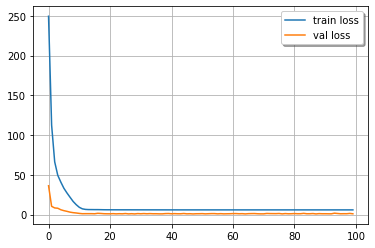

In [34]:
print("\n\nLoss History: ")
plt.plot(loss_train_history, label='train loss')
plt.plot(loss_val_history, label='val loss')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show()



Loss History (from 10 to ...): 


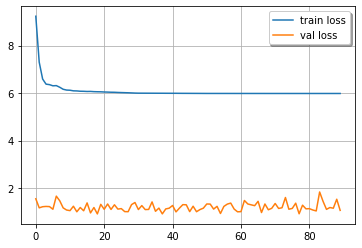

In [35]:
print("\n\nLoss History (from 10 to ...): ")
plt.plot(loss_train_history[10:], label='train loss')
plt.plot(loss_val_history[10:], label='val loss')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show()

In [36]:
def show_graphics(y_test, y_pred):
    print("\n\nGraphic: ")
    x_ax = range(len(y_test))
    plt.plot(x_ax, y_test, label='original')
    plt.plot(x_ax, y_pred, label='predicted')
    plt.title("Laptop prices")
    plt.xlabel("X-axis")
    plt.ylabel("Y-axis")
    plt.legend(loc='best', fancybox=True, shadow=True)
    plt.grid(True)
    plt.show()

In [37]:
predicted = torch.Tensor()
target = torch.Tensor()
with torch.no_grad():
    for data,labels in test_loader:
        output=model(data) 
        predicted = torch.cat((predicted, output))
        target = torch.cat((target, labels))



Graphic: 


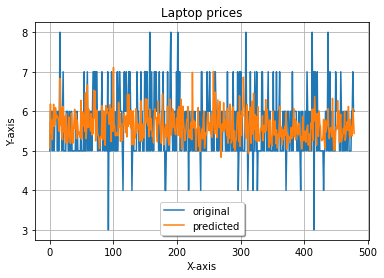

In [38]:
show_graphics(target.tolist(), predicted.tolist())